# Lab 10: Convolutional neural networks

In [1]:
import numpy as np
import librosa.display, os
import matplotlib.pyplot as plt
%matplotlib inline
 
def create_spectrogram(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
 
    y, sr = librosa.load(audio_file)
    ms = librosa.feature.melspectrogram(y=y, sr=sr)
    log_ms = librosa.power_to_db(ms, ref=np.max)
    librosa.display.specshow(log_ms, sr=sr)
 
    fig.savefig(image_file)
    plt.close(fig)
     
def create_pngs_from_wavs(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)
 
    dir = os.listdir(input_path)
 
    for i, file in enumerate(dir):
        input_file = os.path.join(input_path, file)
        output_file = os.path.join(output_path, file.replace('.wav', '.png'))
        create_spectrogram(input_file, output_file)

In [2]:
create_pngs_from_wavs('Sounds/background', 'Spectrograms/background')

In [3]:
create_pngs_from_wavs('Sounds/chainsaw', 'Spectrograms/chainsaw')

In [4]:
create_pngs_from_wavs('Sounds/engine', 'Spectrograms/engine')

In [5]:
create_pngs_from_wavs('Sounds/storm', 'Spectrograms/storm')

In [6]:
from tensorflow.keras.preprocessing import image

def load_images_from_path(path, label):
    images, labels = [], []

    for file in os.listdir(path):
        images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
        labels.append((label))
        
    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)
        
x, y = [], []

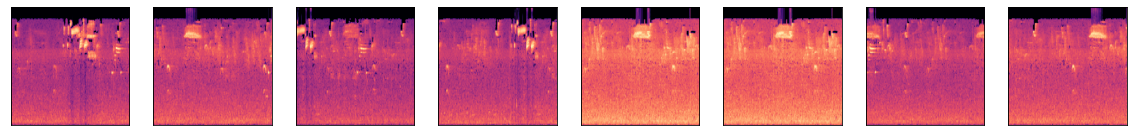

In [7]:
images, labels = load_images_from_path('Spectrograms/background', 0)
show_images(images)
    
x += images
y += labels

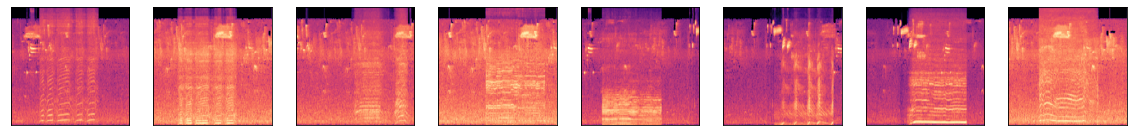

In [8]:
images, labels = load_images_from_path('Spectrograms/chainsaw', 1)
show_images(images)
    
x += images
y += labels

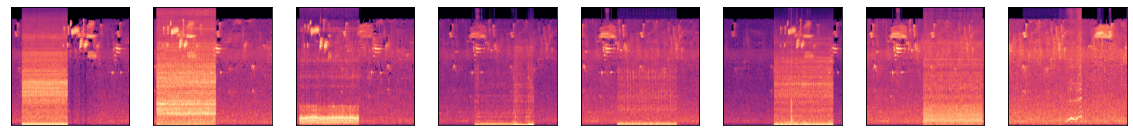

In [9]:
images, labels = load_images_from_path('Spectrograms/engine', 2)
show_images(images)
    
x += images
y += labels

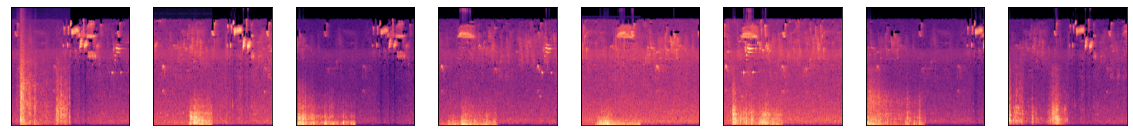

In [10]:
images, labels = load_images_from_path('Spectrograms/storm', 3)
show_images(images)
    
x += images
y += labels

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=0)

x_train_norm = np.array(x_train) / 255
x_test_norm = np.array(x_test) / 255

y_train = np.array(y_train)
y_test = np.array(y_test)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary(line_length=100)

Model: "sequential"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 conv2d (Conv2D)                             (None, 222, 222, 32)                    896            
                                                                                                    
 max_pooling2d (MaxPooling2D)                (None, 111, 111, 32)                    0              
                                                                                                    
 conv2d_1 (Conv2D)                           (None, 109, 109, 64)                    18496          
                                                                                                    
 max_pooling2d_1 (MaxPooling2D)              (None, 54, 54, 64)                      0              
                                                                       

In [13]:
hist = model.fit(x_train_norm, y_train, validation_data=(x_test_norm, y_test), batch_size=10, epochs=10)

Epoch 1/10
28/28 [==============================] - 8s 256ms/step - loss: 1.4646 - accuracy: 0.2964 - val_loss: 1.2122 - val_accuracy: 0.4833
Epoch 2/10
28/28 [==============================] - 7s 251ms/step - loss: 0.9286 - accuracy: 0.6286 - val_loss: 0.8032 - val_accuracy: 0.6333
Epoch 3/10
28/28 [==============================] - 7s 244ms/step - loss: 0.6449 - accuracy: 0.6857 - val_loss: 0.6533 - val_accuracy: 0.7083
Epoch 4/10
28/28 [==============================] - 7s 242ms/step - loss: 0.5829 - accuracy: 0.6786 - val_loss: 0.5146 - val_accuracy: 0.7667
Epoch 5/10
28/28 [==============================] - 7s 241ms/step - loss: 0.4914 - accuracy: 0.7464 - val_loss: 0.4958 - val_accuracy: 0.8667
Epoch 6/10
28/28 [==============================] - 7s 259ms/step - loss: 0.4221 - accuracy: 0.8107 - val_loss: 0.4689 - val_accuracy: 0.8083
Epoch 7/10
28/28 [==============================] - 7s 258ms/step - loss: 0.4171 - accuracy: 0.8107 - val_loss: 0.4167 - val_accuracy: 0.8167
Epoch 

[]

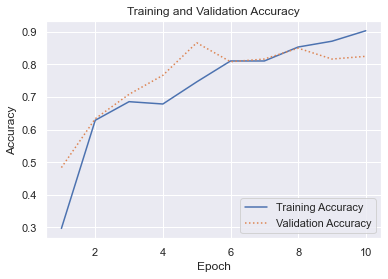

In [14]:
import seaborn as sns
sns.set()

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [15]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet import preprocess_input

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x_train_norm = preprocess_input(np.array(x_train))
x_test_norm = preprocess_input(np.array(x_test))

train_features = base_model.predict(x_train_norm)
test_features = base_model.predict(x_test_norm)

4/4 [==============================] - 1s 245ms/step


In [16]:
model = Sequential()
model.add(Flatten(input_shape=train_features.shape[1:]))
model.add(Dense(1024, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
hist = model.fit(train_features, y_train, validation_data=(test_features, y_test), batch_size=10, epochs=10)

Epoch 1/10
28/28 [==============================] - 4s 133ms/step - loss: 37.9072 - accuracy: 0.6107 - val_loss: 7.7565 - val_accuracy: 0.8417
Epoch 2/10
28/28 [==============================] - 4s 128ms/step - loss: 4.2975 - accuracy: 0.9107 - val_loss: 10.5162 - val_accuracy: 0.7833
Epoch 3/10
28/28 [==============================] - 4s 129ms/step - loss: 1.7712 - accuracy: 0.9286 - val_loss: 2.3697 - val_accuracy: 0.9167
Epoch 4/10
28/28 [==============================] - 4s 128ms/step - loss: 0.1782 - accuracy: 0.9786 - val_loss: 1.8752 - val_accuracy: 0.8917
Epoch 5/10
28/28 [==============================] - 4s 127ms/step - loss: 0.0712 - accuracy: 0.9857 - val_loss: 0.6574 - val_accuracy: 0.9417
Epoch 6/10
28/28 [==============================] - 4s 128ms/step - loss: 0.4617 - accuracy: 0.9821 - val_loss: 3.5639 - val_accuracy: 0.9083
Epoch 7/10
28/28 [==============================] - 4s 129ms/step - loss: 0.5344 - accuracy: 0.9643 - val_loss: 0.8013 - val_accuracy: 0.9333
Epoc

[]

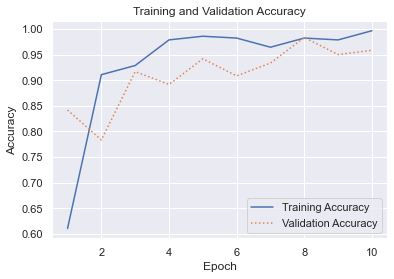

In [18]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

4/4 [==============================] - 0s 18ms/step


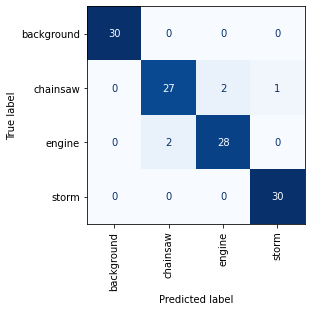

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay as cmd

sns.reset_orig()
fig, ax = plt.subplots(figsize=(4, 4))
y_pred = model.predict(test_features)
class_labels = ['background', 'chainsaw', 'engine', 'storm']

cmd.from_predictions(y_test, y_pred.argmax(axis=1),
                     display_labels=class_labels, colorbar=False,
                     cmap='Blues', xticks_rotation='vertical', ax=ax)

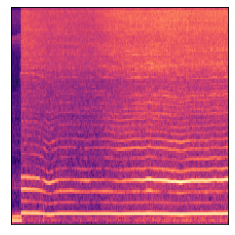

In [20]:
create_spectrogram('Sounds/samples/sample1.wav', 'Spectrograms/sample1.png')

x = image.load_img('Spectrograms/sample1.png', target_size=(224, 224))
plt.xticks([])
plt.yticks([])
plt.imshow(x)

In [21]:
x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

y = base_model.predict(x)
predictions = model.predict(y)

for i, label in enumerate(class_labels):
    print(f'{label}: {predictions[0][i]}')

1/1 [==============================] - 0s 25ms/step
background: 0.0
chainsaw: 1.0
engine: 1.9010449681458597e-13
storm: 0.0


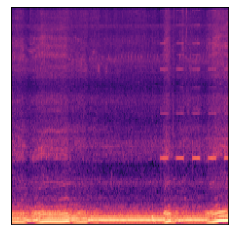

In [22]:
create_spectrogram('Sounds/samples/sample2.wav', 'Spectrograms/sample2.png')

x = image.load_img('Spectrograms/sample2.png', target_size=(224, 224))
plt.xticks([])
plt.yticks([])
plt.imshow(x)

In [23]:
x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

y = base_model.predict(x)
predictions = model.predict(y)

for i, label in enumerate(class_labels):
    print(f'{label}: {predictions[0][i]}')

1/1 [==============================] - 0s 26ms/step
background: 0.0
chainsaw: 1.7287385065123395e-11
engine: 1.0
storm: 0.0
